### Predicting the Price of Microsoft Stock

This class will look to build an ARIMA(p, d, q) model from a history of Microsoft's stock price.

##### Step 1:  Load in the data set

In [4]:
import pandas as pd

df= pd.read_csv('msft.csv',index_col='Date',parse_dates=True)

In [5]:
df.head()

,Close
Date,
1986-03-01,0.095486
1986-04-01,0.111979
1986-05-01,0.121528
1986-06-01,0.106771
1986-07-01,0.098958


##### Step 2:  Turn It Into A Stationary Time Series (You can do the same process that was used before)

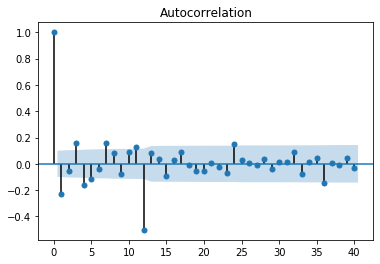

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

stationary_data = df['Close'].diff().diff(periods=12)[13:]
x=plot_acf(stationary_data,lags=40)

##### Step 4:  Using statsmodels, grab the acf and pacf plots to get an idea of what your p and q terms will be

##### Step 5: Fit the Model

In [11]:
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Close'], order=(1, 1, 1))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  402
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -981.626
Method:                       css-mle   S.D. of innovations              2.781
Date:                Mon, 26 Aug 2019   AIC                           1971.251
Time:                        19:46:19   BIC                           1987.237
Sample:                             1   HQIC                          1977.581
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3387      0.114      2.970      0.003       0.115       0.562
ar.L1.D.Close    -0.1601      0.150     -1.069      0.286      -0.454       0.134
ma.L1.D.Close    -0.0467      0.146     

##### Step 6:  Pull Its Summary

In [12]:
results.forecast()

(array([136.54225778]),
 array([2.78114514]),
 array([[131.09131347, 141.99320208]]))

##### Step 7:  What Are the Final Parameters of Your Model?

Write them down on your nameplate!

##### Step 8:  What Is The Predicted Stock Price in 3 Months Time? (Convert the price back to dollars)

In [13]:
results.forecast(steps=3)

(array([136.54225778, 136.86918621, 137.20977278]),
 array([2.78114514, 3.5499281 , 4.22892192]),
 array([[131.09131347, 141.99320208],
        [129.91145499, 143.82691743],
        [128.92123812, 145.49830744]]))

In [14]:
results.aic

1971.251262758969

Write down your results on your nameplate

##### Step 9:  What Is The 95% Confidence Interval?

Write down your results on your nameplate.